# Orlando Crime Analysis - Esri SE Concference

## Updates Notes

#### 1) Most Recent Month - Feb 2022

* Feb 4, 2022 Friday
    * Create crime heatmaps of Day of week and Hours by Crime Categories
    * Craete correlation plots of ACS data (Housing vacancy change, Median housing rent, Un-employment rate, Precetange of educational attainment less than high school diploma) 
    <br>
    <br>
* Feb 2, 2022 Wednesday
    * Complete all spatial join and created plots
    * Finally complete the troubleshooting on installing geopandas!
        * 1) deleted all environments except base and arcgspro-py3 base in Python Prompt Command.
        * 2) After rebooting, set the environment to arcgispro-py3 base, and then created clone environment in Python Prompt Command: 'conda create -n yourcloneenv --clone arcgispro-py3'
        * 3) After rebooting again, installed the anaconda in Python Prompt Command: 'conda install anaconda'
        * 4) After rebooting one more time, updated all environments in Python Commnad Prompt: 'conda update --all'
        * 5) After rebooting, installed geopandas in Python Prompt Command: 'conda install geopandas'
        * 6) Successfully imported geopandas in Jupyter Notebook in ArcGIS Pro
    <br>
    <br>
* Feb 1, 2022 Tuesday
    * Spatial join the neighborhood join data with the census block data
    * Trying to solve the error issue on installing Geopandas - Not solved yet
    <br>
    <br>

#### 2) Archive

* Jan 31, 2022 Monday
    * Complete the getting ACS block data in 2015 and 2019 in R
    * Trying to solve the error issue on exporting the completed spatial dataframe to a shapefile in a local drive as well as to a layer in ArcGIS Online - Not solved yet
    <br>
    <br>
* Jan 28, 2022 Friday
    * Spatial joined the neighborhood crime data with the census block data in 2019 and 2015.
    * Included more variables into ACS block data, such as Housing monthly owner costs, available vehicles by household, and transportation means to work - did not finish
    <br>
    <br>
* Jan 27, 2022 Thursday
    * Created the new census data based on census blocks in 2015, 2019 (ACS-5 years estiamtes)
    * Trying to solve the error issue on exporting the completed spatial dataframe to a shapefile in a local drive as well as to a layer in ArcGIS Online - Not solved yet
    <br>
    <br>    
* Jan 26, 2022 Wednesday
    * Crime Analysis Solutions - Analysis Reference
    * Create analysis layers 
        * Hotspot-coldspot analysis
        * Emerging Hotspot-coldspot Analysis
        * Optimized Hotspot Analysis
    <br>
    <br>            
* Jan 25, 2022
    * Referenceed the Esri's Crime Analysis Solutions
    * Import the collected ACS data and merge it wiht the orlando crime data
    * Create scatter plots with the varaibles to check correlations
    * Troubleshooting on installing Geopandas
        * Could not solve -> instead solved the issue at R, and imported to Notebook
    <br>
    <br>            
* Jan 24, 2022
    * Manpulate ACS data and create new columns and maps by using R (OPD_Crime_Analysis_220124.R)
    * Craete a barplot for densities as well as a heatmap of crime incidents by day of week and hour of day
    <br>
    <br>        
* Jan 21, 2022
    * sovle the isuse on python environment: cannot install python module with pip install, conda install
        * => create new python environment: Command Prompt, conda create -k --clone arcgispro-py3 --name arcgispro-py3-clone
    * Research census data related to the crime data (modeling for crime)
    * Collect ACS in R and import them (OPD_Crime_Analysis_220121.R)
    <br>
    <br>        
* Jan 20, 2022 
    * Spatial join crime data with neighborhoods shapefile
    * Create a bar plot of crime cases by neighborhoods in 2020
    <br>
    <br>        
* Jan 19, 2022
    * Develop and re-organize analysis process
    * 3. Data Wrangling - 1) Read CSV, 2) Check data, 3) Clean data
    <br>
    <br>        
* Jan 18. 2022
    * Develop datetime analysis and create three plots

## 0. Configuration

In [2]:
# Import Modules
import requests
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from osgeo import osr
%matplotlib inline
plt.style.use('classic')
import json
import csv
import os
import ast
import geopandas as gpd
from osgeo import osr
from arcpy import env
from arcgis import GIS
from arcgis.gis import GIS
from arcgis.features import SpatialDataFrame
from arcgis.geocoding import geocode
from arcgis.geometry import lengths, areas_and_lengths, project, Point, Polyline, Polygon, Geometry
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.geoprocessing import import_toolbox
from datetime import datetime
from datetime import datetime
from dateutil import parser
from scipy import stats

Can't find requested entry point: GDALRegisterMe
Can't find requested entry point: GDALRegister_nitf
Can't find requested entry point: GDALRegisterMe
Can't find requested entry point: GDALRegister_nitf


In [3]:
# LOG-IN TO ARCGIS ONLINE
gis = GIS("https://www.arcgis.com", "kjhoon", "Apotheosis3267!")

In [4]:
# Set the data path in this project
data_pth = r'C:/Users/KIM36105/Downloads/Orlando_Crime_Analysis'

## 1. Preparation

In [4]:
# 1. Read csv from the local drive
# To sillence SettingWithCopyWarning
pd.options.mode.chained_assignment = None

crime_df1 = pd.read_csv(r'C:/Users/KIM36105/Downloads/OPD_Crimes.csv')
crime_df1.info()

# Other ways
# 1) Read csv from the JSON API
# crime_df0 = pd.read_json(r'https://data.cityoforlando.net/resource/4y9m-jbmz.json')

# 2) Read csv from Cloud Database using SQL (IBM DB2)
# Service Credentials
# "username": "gtr22671"
# "password": "yeTtnClz98DSRKWv"
# "hostname": "55fbc997-9266-4331-afd3-888b05e734c0.bs2io90l08kqb1od8lcg.databases.appdomain.cloud"
# "port": 31929
# "database": "bludb"
# After upload to the server, it can be extracted from the server.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238491 entries, 0 to 238490
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Case Number                 238491 non-null  object
 1   Case Date Time              238489 non-null  object
 2   Case Location               238491 non-null  object
 3   Case Offense Location Type  238491 non-null  object
 4   Case Offense Category       238491 non-null  object
 5   Case Offense Type           238491 non-null  object
 6   Case Offense Charge Type    238491 non-null  object
 7   Case Disposition            238491 non-null  object
 8   Status                      238491 non-null  object
 9   Location                    228265 non-null  object
dtypes: object(10)
memory usage: 18.2+ MB


In [5]:
# Check dataframe briefly
crime_df1.head(3)

,Case Number,Case Date Time,Case Location,Case Offense Location Type,Case Offense Category,Case Offense Type,Case Offense Charge Type,Case Disposition,Status,Location
0,2020-00000700,01/01/2020 03:44:00 PM,9400 Block of JEFF FUQUA BLVD,Airport,Theft,All other larceny,Committed,Open,Unmapped,NaN
1,2019-00002818,01/03/2019 08:22:00 AM,4900 Block of FIJI CIR,Residence/Single,Theft,All other larceny,Committed,Closed,Mapped,"(28.60235426, -81.43691172)"
2,2020-00004890,01/05/2020 09:48:00 AM,9300 Block of JEFF FUQUA BLVD,Airport,Theft,All other larceny,Committed,Closed,Unmapped,NaN


In [6]:
# 2. Remove NA
crime_df1_dropna = crime_df1.dropna(subset=['Case Date Time','Location'])
crime_df1_dropna.info()
# From the original, totla 10,226 cases removed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228265 entries, 1 to 238490
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Case Number                 228265 non-null  object
 1   Case Date Time              228265 non-null  object
 2   Case Location               228265 non-null  object
 3   Case Offense Location Type  228265 non-null  object
 4   Case Offense Category       228265 non-null  object
 5   Case Offense Type           228265 non-null  object
 6   Case Offense Charge Type    228265 non-null  object
 7   Case Disposition            228265 non-null  object
 8   Status                      228265 non-null  object
 9   Location                    228265 non-null  object
dtypes: object(10)
memory usage: 19.2+ MB


In [7]:
# 3. Add more columns
# Create Date and Time columns from the 'Case Date Time' column
crime_df1_dropna['Case Date Time'] = pd.to_datetime(crime_df1_dropna['Case Date Time'], format = '%m/%d/%Y %I:%M:%S %p')
crime_df1_dropna['Date'] = pd.DatetimeIndex(crime_df1_dropna['Case Date Time']).date.astype(str)
crime_df1_dropna['Time'] = pd.DatetimeIndex(crime_df1_dropna['Case Date Time']).time.astype(str)
crime_df1_dropna['Year'] = pd.DatetimeIndex(crime_df1_dropna['Case Date Time']).year.astype(int)
crime_df1_dropna['Month'] = pd.DatetimeIndex(crime_df1_dropna['Case Date Time']).month.astype(int)
crime_df1_dropna['Day'] = pd.DatetimeIndex(crime_df1_dropna['Case Date Time']).day.astype(int)
crime_df1_dropna['Hour'] = pd.DatetimeIndex(crime_df1_dropna['Case Date Time']).hour.astype(int)
crime_df1_dropna['Weekday'] = pd.DatetimeIndex(crime_df1_dropna['Case Date Time']).dayofweek.astype(str)

# Create Daytime and Night time Column with if-else function
def daynight(row):
    if row['Hour'] >= 7 and row['Hour'] < 19:
        dntime = "DayTime"
    else: 
        dntime = "NightTime"
    return dntime
crime_df1_dropna['DayNight'] = crime_df1_dropna.apply(daynight, axis=1)

# Replace values in 'Weekday' column
crime_df1_dropna['Weekday'] = crime_df1_dropna['Weekday'].replace(
    [0, 1, 2, 3, 4, 5, 6],
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

crime_df1_dropna.head(3)

,Case Number,Case Date Time,Case Location,Case Offense Location Type,Case Offense Category,Case Offense Type,Case Offense Charge Type,Case Disposition,Status,Location,Date,Time,Year,Month,Day,Hour,Weekday,DayNight
1,2019-00002818,2019-01-03 08:22:00,4900 Block of FIJI CIR,Residence/Single,Theft,All other larceny,Committed,Closed,Mapped,"(28.60235426, -81.43691172)",2019-01-03,08:22:00,2019,1,3,8,3,DayTime
3,2020-00007368,2020-01-07 13:04:00,4700 Block of N PINE HILLS RD,Apartment/Condo,Robbery,Robbery,Committed,Arrest,Mapped,"(28.60018728, -81.45147832)",2020-01-07,13:04:00,2020,1,7,13,1,DayTime
6,2019-00011880,2019-01-09 20:17:00,1900 Block of CONWAY RD,Apartment/Condo,Assault,Simple assault,Committed,Inactive,Mapped,"(28.51715097, -81.33099064)",2019-01-09,20:17:00,2019,1,9,20,2,NightTime


In [8]:
# 4. Create X, Y columns
crime_df1_dropna['Location'] = crime_df1_dropna['Location'].str.replace("(","")
crime_df1_dropna['Location'] = crime_df1_dropna['Location'].str.replace(")","")

lat = []
lon = []

for row in crime_df1_dropna['Location']:
    try:
        lat.append(row.split(',')[0])
        lon.append(row.split(',')[1])
    except:
        lat.append(np.NaN)
        lon.append(np.NaN)

crime_df1_dropna['Latitude'] = lat
crime_df1_dropna['Longitude'] = lon
crime_df1_dropna.head()

D66140B0-0277-45FF-AE18-A787BE3D4AAF:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
D66140B0-0277-45FF-AE18-A787BE3D4AAF:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


,Case Number,Case Date Time,Case Location,Case Offense Location Type,Case Offense Category,Case Offense Type,Case Offense Charge Type,Case Disposition,Status,Location,Date,Time,Year,Month,Day,Hour,Weekday,DayNight,Latitude,Longitude
1,2019-00002818,2019-01-03 08:22:00,4900 Block of FIJI CIR,Residence/Single,Theft,All other larceny,Committed,Closed,Mapped,"28.60235426, -81.43691172",2019-01-03,08:22:00,2019,1,3,8,3,DayTime,28.60235426,-81.43691172
3,2020-00007368,2020-01-07 13:04:00,4700 Block of N PINE HILLS RD,Apartment/Condo,Robbery,Robbery,Committed,Arrest,Mapped,"28.60018728, -81.45147832",2020-01-07,13:04:00,2020,1,7,13,1,DayTime,28.60018728,-81.45147832
6,2019-00011880,2019-01-09 20:17:00,1900 Block of CONWAY RD,Apartment/Condo,Assault,Simple assault,Committed,Inactive,Mapped,"28.51715097, -81.33099064",2019-01-09,20:17:00,2019,1,9,20,2,NightTime,28.51715097,-81.33099064
12,2020-00022339,2020-01-19 02:51:00,3200 Block of S SEMORAN BLVD,Highway/Road/Alley,Assault,Simple assault,Committed,Inactive,Mapped,"28.51083543, -81.31031512",2020-01-19,02:51:00,2020,1,19,2,6,NightTime,28.51083543,-81.31031512
18,2020-00037177,2020-01-31 08:10:00,500 Block of N JOHN YOUNG PKWY,Bus/Rail Terminal,Assault,Simple assault,Committed,Arrest,Mapped,"28.54799721, -81.41373753",2020-01-31,08:10:00,2020,1,31,8,4,DayTime,28.54799721,-81.41373753


In [9]:
# 5. Change the dataframe to sdf
crime_sdf1 = pd.DataFrame.spatial.from_xy(crime_df1_dropna, 'Longitude', 'Latitude')
crime_sdf1.head()
# The sdf spatial reference is "epsg:4326"

,Case Number,Case Date Time,Case Location,Case Offense Location Type,Case Offense Category,Case Offense Type,Case Offense Charge Type,Case Disposition,Status,Location,Date,Time,Year,Month,Day,Hour,Weekday,DayNight,Latitude,Longitude,SHAPE
1,2019-00002818,2019-01-03 08:22:00,4900 Block of FIJI CIR,Residence/Single,Theft,All other larceny,Committed,Closed,Mapped,"28.60235426, -81.43691172",2019-01-03,08:22:00,2019,1,3,8,3,DayTime,28.60235426,-81.43691172,"{""spatialReference"": {""wkid"": 4326}, ""x"": "" -8..."
3,2020-00007368,2020-01-07 13:04:00,4700 Block of N PINE HILLS RD,Apartment/Condo,Robbery,Robbery,Committed,Arrest,Mapped,"28.60018728, -81.45147832",2020-01-07,13:04:00,2020,1,7,13,1,DayTime,28.60018728,-81.45147832,"{""spatialReference"": {""wkid"": 4326}, ""x"": "" -8..."
6,2019-00011880,2019-01-09 20:17:00,1900 Block of CONWAY RD,Apartment/Condo,Assault,Simple assault,Committed,Inactive,Mapped,"28.51715097, -81.33099064",2019-01-09,20:17:00,2019,1,9,20,2,NightTime,28.51715097,-81.33099064,"{""spatialReference"": {""wkid"": 4326}, ""x"": "" -8..."
12,2020-00022339,2020-01-19 02:51:00,3200 Block of S SEMORAN BLVD,Highway/Road/Alley,Assault,Simple assault,Committed,Inactive,Mapped,"28.51083543, -81.31031512",2020-01-19,02:51:00,2020,1,19,2,6,NightTime,28.51083543,-81.31031512,"{""spatialReference"": {""wkid"": 4326}, ""x"": "" -8..."
18,2020-00037177,2020-01-31 08:10:00,500 Block of N JOHN YOUNG PKWY,Bus/Rail Terminal,Assault,Simple assault,Committed,Arrest,Mapped,"28.54799721, -81.41373753",2020-01-31,08:10:00,2020,1,31,8,4,DayTime,28.54799721,-81.41373753,"{""spatialReference"": {""wkid"": 4326}, ""x"": "" -8..."


In [27]:
# 6. Export sdf to shapefile
ORL_CrimeAllPoints_lyr = crime_sdf1.spatial.to_featurelayer('CrimeAllPoints_220202',
                                                            folder = '1_ORL_Crime'
                                                           )
ORL_CrimeAllPoints_lyr
# id = 48353b5f2fca4feba56106bb90e31278

In [28]:
# 7. Export neighborhoods shapefile in a local drive to ArcGIS Online
Neighbors_shp = r"Orlando_Neighborhoods.shp"
Neighbors_sdf = pd.DataFrame.spatial.from_featureclass(os.path.join(data_pth, Neighbors_shp))

ORL_Neighbors_lyr = Neighbors_sdf.spatial.to_featurelayer('NeighborsPolygons_220202',
                                                          folder = '1_ORL_Crime'
                                                         )
ORL_Neighbors_lyr
# id = 64ba3daf0a9f4bbbb96aefa243cf9b75

<Item title:"NeighborsPolygons_220202" type:Feature Layer Collection owner:kjhoon>

In [35]:
# 8. Export ACS shapefile in a local drive to ArcGIS Online
ACS1917_shp = r"ACS1917_220202.shp"
ACS1917_sdf = pd.DataFrame.spatial.from_featureclass(os.path.join(data_pth, ACS1917_shp))

Orange_ACS1917_lyr = ACS1917_sdf.spatial.to_featurelayer('Ornage_ACS1917_220202',
                                                         folder = '1_ORL_Crime'
                                                        )
Orange_ACS1917_lyr
# id = 7aded098d30b4607a52f5a1d2b95c82e

<Item title:"Ornage_ACS1917_220202" type:Feature Layer Collection owner:kjhoon>

## 2. Import Lyaers & Spatial-join

In [36]:
# 1-1. Import the crime points layer as sdf with the same projection
# Please change the share setting as Public in ArcGIS Online to access the layer
item1 = GIS().content.get("48353b5f2fca4feba56106bb90e31278")
flayer1 = item1.layers[0]
CrimeAllPoints_sdf = pd.DataFrame.spatial.from_layer(flayer1)
CrimeAllPoints_sdf['SHAPE'] = CrimeAllPoints_sdf['SHAPE'].geom.project_as(4326)
CrimeAllPoints_sdf.head()

,OBJECTID,SHAPE,case_date_time,case_disposition,case_location,case_number,case_offense_category,case_offense_charge_type,case_offense_location_type,case_offense_type,date,day,day_night,hour,latitude,location,longitude,month,status,time,weekday,year
0,1,"{""x"": -81.43691171999997, ""y"": 28.602354260000...",2019-01-03 08:22:00,Closed,4900 Block of FIJI CIR,2019-00002818,Theft,Committed,Residence/Single,All other larceny,2019-01-03,3,DayTime,8,28.60235426,"28.60235426, -81.43691172",-81.43691172,1,Mapped,08:22:00,3,2019
1,2,"{""x"": -81.45147831999999, ""y"": 28.600187280000...",2020-01-07 13:04:00,Arrest,4700 Block of N PINE HILLS RD,2020-00007368,Robbery,Committed,Apartment/Condo,Robbery,2020-01-07,7,DayTime,13,28.60018728,"28.60018728, -81.45147832",-81.45147832,1,Mapped,13:04:00,1,2020
2,3,"{""x"": -81.33099063999998, ""y"": 28.517150970000...",2019-01-09 20:17:00,Inactive,1900 Block of CONWAY RD,2019-00011880,Assault,Committed,Apartment/Condo,Simple assault,2019-01-09,9,NightTime,20,28.51715097,"28.51715097, -81.33099064",-81.33099064,1,Mapped,20:17:00,2,2019
3,4,"{""x"": -81.31031511999998, ""y"": 28.510835430000...",2020-01-19 02:51:00,Inactive,3200 Block of S SEMORAN BLVD,2020-00022339,Assault,Committed,Highway/Road/Alley,Simple assault,2020-01-19,19,NightTime,2,28.51083543,"28.51083543, -81.31031512",-81.31031512,1,Mapped,02:51:00,6,2020
4,5,"{""x"": -81.41373752999993, ""y"": 28.547997210000...",2020-01-31 08:10:00,Arrest,500 Block of N JOHN YOUNG PKWY,2020-00037177,Assault,Committed,Bus/Rail Terminal,Simple assault,2020-01-31,31,DayTime,8,28.54799721,"28.54799721, -81.41373753",-81.41373753,1,Mapped,08:10:00,4,2020


In [37]:
# 1-2. Import the neighborhood polygon layer as sdf with the same projection
item2 = GIS().content.get("64ba3daf0a9f4bbbb96aefa243cf9b75")
flayer2 = item2.layers[0]
Neighbors_sdf = pd.DataFrame.spatial.from_layer(flayer2)
Neighbors_sdf['SHAPE'] = Neighbors_sdf['SHAPE'].geom.project_as(4326)
Neighbors_sdf.head()

,OBJECTID,fid,object_id,neighborho,neighbor_1,color,global_id,shape_leng,Shape__Area,Shape__Length,SHAPE
0,1,0,1,Park Central,110,10551295,{BAC51F59-BBDB-4CF3-B604-B637B92D2B15},0.056766,6.847030e+05,6656.257887,"{""rings"": [[[-81.40939277399997, 28.4942327930..."
1,2,1,2,Pershing,113,16752895,{53281F2A-EE1B-48BA-8880-07E218CCCCF2},0.012409,1.065938e+05,1508.437519,"{""rings"": [[[-81.29578926100001, 28.4957231310..."
2,3,2,3,Azalea Park,4,10551295,{46AB8C3B-918D-4F63-BAA8-2D3F87E51FB6},0.034415,6.353966e+05,4102.798266,"{""rings"": [[[-81.31051777999994, 28.5472152820..."
3,4,3,4,Bryn Mawr,7,16752895,{9C90B9E5-2B1C-4BC0-82F2-0DFDFA8468D0},0.057464,1.479853e+06,6768.740925,"{""rings"": [[[-81.31456599999996, 28.5149107630..."
4,5,4,5,Callahan,8,10551295,{03E976BC-B5D9-4015-99D2-6FFF186372A2},0.043581,1.503599e+06,5081.778235,"{""rings"": [[[-81.38305051899994, 28.5493889820..."


In [38]:
# 1-3. Import the ACS-5years 19, 17 layers as sdf with the same projection
item3 = GIS().content.get("7aded098d30b4607a52f5a1d2b95c82e")
flayer3 = item3.layers[0]
ACS1917_sdf = pd.DataFrame.spatial.from_layer(flayer3)
ACS1917_sdf['SHAPE'] = ACS1917_sdf['SHAPE'].geom.project_as(4326)
ACS1917_sdf.head()

,OBJECTID,fid,geoid,pp_t_19,pp_t_17,pp_t_97,hh_t_19,hh_t_17,hh_t_97,rc_w_19,rc_f_19,rc_h_19,rc_s_19,rc_t_19,rc_w_17,rc_f_17,rc_h_17,rc_s_17,rc_t_17,rc_w_97,rc_f_97,rc_h_97,rc_s_97,rc_t_97,hs_v_19,hs_v_17,hs_v_97,hs_mr_19,hs_mr_17,hs_m_97,hs_c_19,hs_c_17,hs_c_97,h_10_19,h_0009_19,h_8099_19,h_6079_19,h_59_19,hs_md_19,h_10_17,...,tp_p_19,tp_b_19,tp_w_19,tp_t_19,tp_h_19,tp_1_17,tp_c_17,tp_p_17,tp_b_17,tp_w_17,tp_t_17,tp_h_17,tp_1_97,tp_c_97,tp_p_97,tp_b_97,tp_w_97,tp_t_97,tp_h_97,c_01_19,cp_s_19,c_00_19,in_y_19,in_b_19,in_n_19,c_01_17,cp_s_17,c_00_17,in_y_17,in_b_17,in_n_17,c_01_97,cp_s_97,c_00_97,in_y_97,in_b_97,in_n_97,Shape__Area,Shape__Length,SHAPE
0,1,0,120950102001,783,595,31.6,395,401,-1.5,79.9,5.0,15.1,0.0,0.0,90.3,7.6,0.0,2.2,0.0,-10.4,-2.6,-2.6,-2.2,0.0,22.1,25.3,-3.2,1263,1120,12.8,1955,1950,0.3,0.0,17.8,0.0,11.0,71.2,1953,0.0,...,0.0,0.0,17.5,0.0,7.3,69.6,5.2,0.0,10.7,0.0,0.0,14.5,5.6,-5.2,0.0,-10.7,17.5,0.0,-7.2,100.0,95.7,0.0,100.0,96.2,0.0,100.0,92.8,0.0,92.5,77.1,7.5,0.0,2.9,0.0,7.5,19.1,-7.5,431439.474609,2796.832546,"{""rings"": [[[-81.36859699999994, 28.5531890000..."
1,2,1,120950102002,644,1110,-42.0,252,464,-45.7,45.7,0.0,49.7,0.0,4.7,54.2,0.0,38.6,4.1,3.1,-8.5,0.0,0.0,-4.1,1.6,24.6,7.8,16.8,0,1306,0.0,2148,2136,0.6,0.0,9.0,11.7,7.8,71.6,0,0.0,...,0.0,0.0,3.7,4.2,11.6,77.3,0.0,10.5,0.0,4.0,1.9,6.2,3.2,0.0,-10.5,0.0,-0.3,2.3,5.4,100.0,86.1,0.0,100.0,94.8,0.0,100.0,92.2,0.0,100.0,74.4,0.0,0.0,-6.1,0.0,0.0,20.4,0.0,562494.910156,3299.320781,"{""rings"": [[[-81.36850799999993, 28.5457410000..."
2,3,2,120950102003,1815,1429,27.0,1218,980,24.3,78.7,3.9,9.9,6.3,1.2,79.6,2.4,12.7,4.7,0.6,-0.9,1.5,1.5,1.6,0.6,19.2,19.3,-0.1,1778,1722,3.3,2216,1639,35.2,21.8,50.1,8.8,14.9,4.5,2004,16.5,...,1.2,0.0,13.7,1.8,16.8,74.6,1.0,2.5,0.0,11.5,1.6,8.7,-9.2,0.1,-1.3,0.0,2.2,0.2,8.1,94.4,88.5,5.6,95.7,91.5,4.3,95.1,86.1,4.9,93.7,83.4,6.3,-0.7,2.4,0.7,2.0,8.1,-2.0,329826.927734,2255.098096,"{""rings"": [[[-81.37289599999993, 28.5422499999..."
3,4,3,120950102004,749,697,7.5,463,484,-4.3,89.2,0.0,6.1,2.4,2.3,78.5,0.0,12.8,3.9,4.9,10.7,0.0,0.0,-1.5,-2.6,9.6,7.5,2.1,1113,1091,2.0,2537,1968,28.9,0.0,14.5,21.1,14.8,49.6,1961,0.0,...,0.0,0.0,15.3,0.0,3.1,79.3,4.7,0.0,0.0,12.1,0.0,4.0,-1.8,-0.5,0.0,0.0,3.2,0.0,-0.9,100.0,100.0,0.0,100.0,86.2,0.0,100.0,97.9,0.0,100.0,94.0,0.0,0.0,2.1,0.0,0.0,-7.8,0.0,770234.015625,3578.478821,"{""rings"": [[[-81.37680500000002, 28.5493980000..."
4,5,4,120950102005,944,946,-0.2,510,506,0.8,64.4,1.8,23.3,8.3,2.2,56.6,3.2,29.5,5.1,5.7,7.8,-1.4,-1.4,3.2,-3.5,20.9,15.4,5.5,1253,960,30.5,1311,1444,-9.2,0.0,9.0,9.5,53.8,27.8,1972,0.0,...,12.9,0.0,0.0,2.0,6.6,70.0,0.0,11.9,0.0,0.0,1.0,17.1,2.0,6.5,1.0,0.0,0.0,1.0,-10.5,100.0,94.7,0.0,97.3,85.3,2.7,100.0,83.8,0.0,100.0,87.0,0.0,0.0,10.9,0.0,-2.7,-1.7,2.7,435763.654297,2787.028682,"{""rings"": [[[-81.37686399999994, 28.5531240000..."


Collected ACS 2019 & 2017 data, which are potentially associated with the crime incidents in Orlando, by using R as follows;

* Total Population
* Percentage of Race
    * White
    * African-american
    * Hispanic
    * Asian
    * Others
* Percentage of Educational Attainment
    * Less than High School Diploma
    * High School Diploma or GED
    * Some College or Associate Degree
    * Bachelor's Degree
    * Advanced Degree (Master's, Ph.D, Professional)
* Median Household Income
* Percentage of Income for Rent
* Median Rent Price
* Median Monthly Owner Costs
* Percentage of House Vacancy
* Percentage of below Poverty
* Percentage of Un-employment
* Percentage of Population Not in Civil-labor

In [39]:
# 2-1. Spatial join the crime sdf with the neighborhoods sdf
CrimeAll_Nghbr_sdf = CrimeAllPoints_sdf.spatial.join(Neighbors_sdf)
CrimeAll_Nghbr_sdf.head()

,OBJECTID_left,SHAPE,case_date_time,case_disposition,case_location,case_number,case_offense_category,case_offense_charge_type,case_offense_location_type,case_offense_type,date,day,day_night,hour,latitude,location,longitude,month,status,time,weekday,year,index_right,OBJECTID_right,fid,object_id,neighborho,neighbor_1,color,global_id,shape_leng,Shape__Area,Shape__Length
0,1,"{""x"": -81.43691171999997, ""y"": 28.602354260000...",2019-01-03 08:22:00,Closed,4900 Block of FIJI CIR,2019-00002818,Theft,Committed,Residence/Single,All other larceny,2019-01-03,3,DayTime,8,28.60235426,"28.60235426, -81.43691172",-81.43691172,1,Mapped,08:22:00,3,2019,121,122,121,122,Rosemont,72,10535167,{04484D9A-89AD-4D43-82BC-EB3D998F171A},0.171546,6.150653e+06,20425.688698
1,73,"{""x"": -81.44104680999999, ""y"": 28.597890030000...",2020-06-13 14:47:00,Closed,4400 Block of RING NECK RD,2020-00188109,Theft,Committed,Construction Site,Theft from motor vehicle except parts/accessories,2020-06-13,13,DayTime,14,28.59789003,"28.59789003, -81.44104681",-81.44104681,6,Mapped,14:47:00,5,2020,121,122,121,122,Rosemont,72,10535167,{04484D9A-89AD-4D43-82BC-EB3D998F171A},0.171546,6.150653e+06,20425.688698
2,139,"{""x"": -81.43816676999995, ""y"": 28.597282000000...",2020-06-15 09:38:00,Closed,4400 Block of MARTINS WAY,2020-00189840,Vehicle Theft,Committed,Parking Lot - Surface,Motor vehicle theft,2020-06-15,15,DayTime,9,28.597282,"28.597282, -81.43816677",-81.43816677,6,Mapped,09:38:00,0,2020,121,122,121,122,Rosemont,72,10535167,{04484D9A-89AD-4D43-82BC-EB3D998F171A},0.171546,6.150653e+06,20425.688698
3,193,"{""x"": -81.43816676999995, ""y"": 28.597282000000...",2020-03-11 16:17:00,Closed,4400 Block of MARTINS WAY,2020-00089927,Vehicle Theft,Committed,Apartment/Condo,Motor vehicle theft,2020-03-11,11,DayTime,16,28.597282,"28.597282, -81.43816677",-81.43816677,3,Mapped,16:17:00,2,2020,121,122,121,122,Rosemont,72,10535167,{04484D9A-89AD-4D43-82BC-EB3D998F171A},0.171546,6.150653e+06,20425.688698
4,221,"{""x"": -81.44073521999997, ""y"": 28.592086220000...",2020-05-25 09:00:00,Closed,3800 Block of ROSE OF SHARON DR,2020-00167947,Vehicle Theft,Committed,Parking Lot - Surface,Motor vehicle theft,2020-05-25,25,DayTime,9,28.59208622,"28.59208622, -81.44073522",-81.44073522,5,Mapped,09:00:00,0,2020,121,122,121,122,Rosemont,72,10535167,{04484D9A-89AD-4D43-82BC-EB3D998F171A},0.171546,6.150653e+06,20425.688698


In [43]:
# 2-2. Spatial join the previous joined sdf with the ACS sdf
# Drop unnecessary columns and Rename columns
CrimeAll_Nghbr_drop_sdf = CrimeAll_Nghbr_sdf.drop(["index_right", 
                                                   "OBJECTID_right",
                                                   "fid",
                                                   "object_id",
                                                   "neighbor_1",
                                                   "color",
                                                   "global_id"], axis=1)
# Spatial join with ACS data
CrimeAll_ACS1917_sdf = CrimeAll_Nghbr_drop_sdf.spatial.join(ACS1917_sdf)
CrimeAll_ACS1917_sdf.head()

,OBJECTID_left,SHAPE,case_date_time,case_disposition,case_location,case_number,case_offense_category,case_offense_charge_type,case_offense_location_type,case_offense_type,date,day,day_night,hour,latitude,location,longitude,month,status,time,weekday,year,neighborho,shape_leng,Shape__Area_left,Shape__Length_left,index_right,OBJECTID,fid,geoid,pp_t_19,pp_t_17,pp_t_97,hh_t_19,hh_t_17,hh_t_97,rc_w_19,rc_f_19,rc_h_19,rc_s_19,...,tp_c_19,tp_p_19,tp_b_19,tp_w_19,tp_t_19,tp_h_19,tp_1_17,tp_c_17,tp_p_17,tp_b_17,tp_w_17,tp_t_17,tp_h_17,tp_1_97,tp_c_97,tp_p_97,tp_b_97,tp_w_97,tp_t_97,tp_h_97,c_01_19,cp_s_19,c_00_19,in_y_19,in_b_19,in_n_19,c_01_17,cp_s_17,c_00_17,in_y_17,in_b_17,in_n_17,c_01_97,cp_s_97,c_00_97,in_y_97,in_b_97,in_n_97,Shape__Area_right,Shape__Length_right
0,1,"{""x"": -81.43691171999997, ""y"": 28.602354260000...",2019-01-03 08:22:00,Closed,4900 Block of FIJI CIR,2019-00002818,Theft,Committed,Residence/Single,All other larceny,2019-01-03,3,DayTime,8,28.60235426,"28.60235426, -81.43691172",-81.43691172,1,Mapped,08:22:00,3,2019,Rosemont,0.171546,6.150653e+06,20425.688698,52,53,52,120950124011,10224,8601,18.9,3285,3040,8.1,12.6,70.0,14.9,0.1,...,9.5,8.6,0.0,0.0,0.7,1.8,78.4,7.0,9.9,0.0,0.0,0.8,3.9,1.0,2.5,-1.3,0.0,0.0,-0.1,-2.1,96.1,87.3,3.9,89.0,66.2,11.0,93.8,80.6,6.2,86.6,65.0,13.4,2.3,6.7,-2.3,2.4,1.2,-2.4,3.833232e+06,8102.368639
1,73,"{""x"": -81.44104680999999, ""y"": 28.597890030000...",2020-06-13 14:47:00,Closed,4400 Block of RING NECK RD,2020-00188109,Theft,Committed,Construction Site,Theft from motor vehicle except parts/accessories,2020-06-13,13,DayTime,14,28.59789003,"28.59789003, -81.44104681",-81.44104681,6,Mapped,14:47:00,5,2020,Rosemont,0.171546,6.150653e+06,20425.688698,52,53,52,120950124011,10224,8601,18.9,3285,3040,8.1,12.6,70.0,14.9,0.1,...,9.5,8.6,0.0,0.0,0.7,1.8,78.4,7.0,9.9,0.0,0.0,0.8,3.9,1.0,2.5,-1.3,0.0,0.0,-0.1,-2.1,96.1,87.3,3.9,89.0,66.2,11.0,93.8,80.6,6.2,86.6,65.0,13.4,2.3,6.7,-2.3,2.4,1.2,-2.4,3.833232e+06,8102.368639
2,139,"{""x"": -81.43816676999995, ""y"": 28.597282000000...",2020-06-15 09:38:00,Closed,4400 Block of MARTINS WAY,2020-00189840,Vehicle Theft,Committed,Parking Lot - Surface,Motor vehicle theft,2020-06-15,15,DayTime,9,28.597282,"28.597282, -81.43816677",-81.43816677,6,Mapped,09:38:00,0,2020,Rosemont,0.171546,6.150653e+06,20425.688698,52,53,52,120950124011,10224,8601,18.9,3285,3040,8.1,12.6,70.0,14.9,0.1,...,9.5,8.6,0.0,0.0,0.7,1.8,78.4,7.0,9.9,0.0,0.0,0.8,3.9,1.0,2.5,-1.3,0.0,0.0,-0.1,-2.1,96.1,87.3,3.9,89.0,66.2,11.0,93.8,80.6,6.2,86.6,65.0,13.4,2.3,6.7,-2.3,2.4,1.2,-2.4,3.833232e+06,8102.368639
3,193,"{""x"": -81.43816676999995, ""y"": 28.597282000000...",2020-03-11 16:17:00,Closed,4400 Block of MARTINS WAY,2020-00089927,Vehicle Theft,Committed,Apartment/Condo,Motor vehicle theft,2020-03-11,11,DayTime,16,28.597282,"28.597282, -81.43816677",-81.43816677,3,Mapped,16:17:00,2,2020,Rosemont,0.171546,6.150653e+06,20425.688698,52,53,52,120950124011,10224,8601,18.9,3285,3040,8.1,12.6,70.0,14.9,0.1,...,9.5,8.6,0.0,0.0,0.7,1.8,78.4,7.0,9.9,0.0,0.0,0.8,3.9,1.0,2.5,-1.3,0.0,0.0,-0.1,-2.1,96.1,87.3,3.9,89.0,66.2,11.0,93.8,80.6,6.2,86.6,65.0,13.4,2.3,6.7,-2.3,2.4,1.2,-2.4,3.833232e+06,8102.368639
4,233,"{""x"": -81.43803310999994, ""y"": 28.598341090000...",2020-06-04 19:30:00,Closed,4500 Block of LANDING DR,2020-00179122,Vehicle Theft,Committed,Apartment/Condo,Motor vehicle theft,2020-06-04,4,NightTime,19,28.59834109,"28.59834109, -81.43803311",-81.43803311,6,Mapped,19:30:00,3,2020,Rosemont,0.171546,6.150653e+06,20425.688698,52,53,52,120950124011,10224,8601,18.9,3285,3040,8.1,12.6,70.0,14.9,0.1,...,9.5,8.6,0.0,0.0,0.7,1.8,78.4,7.0,9.9,0.0,0.0,0.8,3.9,1.0,2.5,-1.3,0.0,0.0,-0.1,-2.1,96.1,87.3,3.9,89.0,66.2,11.0,93.8,80.6,6.2,86.6,65.0,13.4,2.3,6.7,-2.3,2.4,1.2,-2.4,3.833232e+06,8102.368639


In [52]:
# 3. Export the spatial joined sdf as a shapefile to ArcGIS Online
ORL_CrimeACS1917_lyr = CrimeAll_ACS1917_sdf.spatial.to_featurelayer('CrimeACS1917_220202',
                                                                    folder = '1_ORL_Crime'
                                                        )
ORL_CrimeACS1917_lyr
# id = 1ccdb7aa8e2947868f0c2e8a8a8a316c

<Item title:"CrimeACS1917_220202" type:Feature Layer Collection owner:kjhoon>

## 3. Analysis

#### 0. Import and clean

In [5]:
# 1. Import the data and check the sdf info and Plan analysis process
item4 = GIS().content.get("1ccdb7aa8e2947868f0c2e8a8a8a316c")
flayer4 = item4.layers[0]
CrimeACS_sdf = pd.DataFrame.spatial.from_layer(flayer4)
CrimeACS_sdf['SHAPE'] = CrimeACS_sdf['SHAPE'].geom.project_as(4326)

CrimeACS_sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218214 entries, 0 to 218213
Columns: 140 entries, OBJECTID to year
dtypes: datetime64[ns](1), float64(101), geometry(1), int64(20), object(17)
memory usage: 233.1+ MB


"Key Findings from the above information"

* 1) The crime datadrame dimension is 238491 (rows) x 10 (columns)
* 2) All columns types are object
* 3) The columns information can be categorized by the followings:
    * a. Primary Key  - "Case Number"
    * b. Time         - "Case Date Time"
    * c. Location     - "Case Location", "Case Offense Location Type", "Status", "Location"
    * d. Offense Info     - "Case Offense Category", "Case Offense Type", "Case Offense Charge Type", "Case Dispostion"



Regarding to the above dataframe information, we need to
  * 1) Remove null values from the columns (2 from "Case Date Time" and 10226 from "Location")
  * 2) Convert the "Case Date Time" datatypes from "object" to "datetime"
  * 3) Create new columns from the datetime column. 
  * 4) Create SEDF and do spatial-join the dataframe with other spatial data
      * a. ZipCode, Neighborhood
      * b. Census Data => Can be used for building a geospatial-prediction model
  * 5) Convert the DataFrame from Long to Wide.
  * 6) Analyze the datasets
      * a. Date Times
          * (1) Year-Month-Day
          * (2) Year-Month
          * (3) Day of Week
          * (4) Hours, AM/PM
      * b. Location
          * Neighborhoods
      * c. Offense Info
          * (1) Offnese Category
          * (2) Offense Type
  * 7) Building a regression model with Census Data
      * a. Linear Regression Model
      * b. Other Regression Model
      * c. Spatial Modeling

In [6]:
# 2. Rename columns and reoder them
# Check the colums
for col_name in CrimeACS_sdf.columns:
    print(col_name)

OBJECTID
SHAPE
c_00_17
c_00_19
c_00_97
c_01_17
c_01_19
c_01_97
case_date_time
case_disposition
case_location
case_number
case_offense_category
case_offense_charge_type
case_offense_location_type
case_offense_type
cp_s_17
cp_s_19
cp_s_97
date
day
day_night
ed_b_17
ed_b_19
ed_b_97
ed_d_17
ed_d_19
ed_d_97
ed_h_17
ed_h_19
ed_h_97
ed_l_17
ed_l_19
ed_l_97
ed_s_17
ed_s_19
ed_s_97
em_c_17
em_c_19
em_c_97
em_l_17
em_l_19
em_l_97
fid
fn_m_17
fn_m_19
fn_m_97
fn_p_17
fn_p_19
fn_p_97
geoid
h_0009_17
h_0009_19
h_10_17
h_10_19
h_59_17
h_59_19
h_6079_17
h_6079_19
h_8099_17
h_8099_19
hh_t_17
hh_t_19
hh_t_97
hour
hs_c_17
hs_c_19
hs_c_97
hs_m_97
hs_md_17
hs_md_19
hs_mr_17
hs_mr_19
hs_v_17
hs_v_19
hs_v_97
in_b_17
in_b_19
in_b_97
in_n_17
in_n_19
in_n_97
in_y_17
in_y_19
in_y_97
index_right
latitude
location
longitude
month
neighborho
objectid_left
pp_t_17
pp_t_19
pp_t_97
rc_f_17
rc_f_19
rc_f_97
rc_h_17
rc_h_19
rc_h_97
rc_s_17
rc_s_19
rc_s_97
rc_t_17
rc_t_19
rc_t_97
rc_w_17
rc_w_19
rc_w_97
shape_area_left
sh

In [7]:
# Rename columns & Drop unnecessary columns
CrimeACS_dict = {
    'hh_t_17': 'HH_TTL_17', 'hh_t_19': 'HH_TTL_19', 'hh_t_97': 'HH_TTL_97',
    'hs_c_17': 'HS_CST_17', 'hs_c_19': 'HS_CST_19', 'hs_c_97': 'HS_CST_97',
    'c_00_17': 'CP_0DV_17', 'c_00_19': 'CP_0DV_19', 'c_00_97': 'CP_0DV_97',
    'c_01_17': 'CP_1DV_17', 'c_01_19': 'CP_1DV_19', 'c_01_97': 'CP_1DV_97',
    'cp_s_17': 'CP_SMT_17', 'cp_s_19': 'CP_SMT_19', 'cp_s_97': 'CP_SMT_97',
    'ed_b_17': 'ED_BAC_17', 'ed_b_19': 'ED_BAC_19', 'ed_b_97': 'ED_BAC_97',
    'ed_d_17': 'ED_ADV_17', 'ed_d_19': 'ED_ADV_19', 'ed_d_97': 'ED_ADV_97',
    'ed_h_17': 'ED_HSC_17', 'ed_h_19': 'ED_HSC_19', 'ed_h_97': 'ED_HSC_97',
    'ed_l_17': 'ED_LES_17', 'ed_l_19': 'ED_LES_19', 'ed_l_97': 'ED_LES_97',
    'ed_s_17': 'ED_COL_17', 'ed_s_19': 'ED_COL_19', 'ed_s_97': 'ED_COL_97',
    'em_c_17': 'EM_UNE_17', 'em_c_19': 'EM_UNE_19', 'em_c_97': 'EM_UNE_97',
    'em_l_17': 'EM_NLB_17', 'em_l_19': 'EM_NLB_19', 'em_l_97': 'EM_NLB_97',
    'fn_m_17': 'FN_INC_17', 'fn_m_19': 'FN_INC_19', 'fn_m_97': 'FN_INC_97',
    'fn_p_17': 'FN_RRT_17', 'fn_p_19': 'FN_RRT_19', 'fn_p_97': 'FN_RRT_97',
    'h_0009_17': 'HS_0009_17', 'h_0009_19': 'HS_0009_19',
    'h_10_17': 'HS_10YY_17', 'h_10_19': 'HS_10YY_19',
    'h_59_17': 'HS_YY59_17', 'h_59_19': 'HS_YY59_19',
    'h_6079_17': 'HS_6079_17', 'h_6079_19': 'HS_6079_19',
    'h_8099_17': 'HS_8099_17', 'h_8099_19': 'HS_8099_19',
    'hs_md_17': 'HS_MYR_17', 'hs_md_19': 'HS_MYR_19',
    'hs_mr_17': 'HS_RNT_17', 'hs_mr_19': 'HS_RNT_19', 'hs_m_97': 'HS_RNT_97',
    'hs_v_17': 'HS_VAC_17', 'hs_v_19': 'HS_VAC_19', 'hs_v_97': 'HS_VAC_97',
    'in_b_17': 'IN_BRD_17', 'in_b_19': 'IN_BRD_19', 'in_b_97': 'IN_BRD_97',
    'in_n_17': 'IN_NAC_17', 'in_n_19': 'IN_NAC_19', 'in_n_97': 'IN_NAC_97',
    'in_y_17': 'IN_ACC_17', 'in_y_19': 'IN_ACC_19', 'in_y_97': 'IN_ACC_97',
    'pp_t_17': 'PP_TTL_17', 'pp_t_19': 'PP_TTL_19', 'pp_t_97': 'PP_TTL_97',
    'rc_f_17': 'RC_AFM_17', 'rc_f_19': 'RC_AFM_19', 'rc_f_97': 'RC_AFM_97',
    'rc_h_17': 'RC_HSP_17', 'rc_h_19': 'RC_HSP_19', 'rc_h_97': 'RC_HSP_97',
    'rc_s_17': 'RC_ASN_17', 'rc_s_19': 'RC_ASN_19', 'rc_s_97': 'RC_ASN_97',
    'rc_t_17': 'RC_OTH_17', 'rc_t_19': 'RC_OTH_19', 'rc_t_97': 'RC_OTH_97',
    'rc_w_17': 'RC_WHT_17', 'rc_w_19': 'RC_WHT_19', 'rc_w_97': 'RC_WHT_97',
    'tp_1_17': 'TP_DR1_17', 'tp_1_19': 'TP_DR1_19', 'tp_1_97': 'TP_DR1_97',
    'tp_b_17': 'TP_BCY_17', 'tp_b_19': 'TP_BCY_19', 'tp_b_97': 'TP_BCY_97',
    'tp_c_17': 'TP_CPL_17', 'tp_c_19': 'TP_CPL_19', 'tp_c_97': 'TP_CPL_97',
    'tp_h_17': 'TP_HOM_17', 'tp_h_19': 'TP_HOM_19', 'tp_h_97': 'TP_HOM_97',
    'tp_p_17': 'TP_PUB_17', 'tp_p_19': 'TP_PUB_19', 'tp_p_97': 'TP_PUB_97',
    'tp_t_17': 'TP_OTH_17', 'tp_t_19': 'TP_OTH_19', 'tp_t_97': 'TP_OTH_97',
    'tp_w_17': 'TP_WLK_17', 'tp_w_19': 'TP_WLK_19', 'tp_w_97': 'TP_WLK_97'}
CrimeACS_sdf.rename(columns = CrimeACS_dict,
                    inplace = True)

CrimeACS_clsdf = CrimeACS_sdf.drop(["index_right",
                                     "objectid_left",
                                     "fid",
                                     "objectid_left"], axis=1)
CrimeACS_clsdf.head()


,OBJECTID,SHAPE,CP_0DV_17,CP_0DV_19,CP_0DV_97,CP_1DV_17,CP_1DV_19,CP_1DV_97,case_date_time,case_disposition,case_location,case_number,case_offense_category,case_offense_charge_type,case_offense_location_type,case_offense_type,CP_SMT_17,CP_SMT_19,CP_SMT_97,date,day,day_night,ED_BAC_17,ED_BAC_19,ED_BAC_97,ED_ADV_17,ED_ADV_19,ED_ADV_97,ED_HSC_17,ED_HSC_19,ED_HSC_97,ED_LES_17,ED_LES_19,ED_LES_97,ED_COL_17,ED_COL_19,ED_COL_97,EM_UNE_17,EM_UNE_19,EM_UNE_97,...,RC_HSP_97,RC_ASN_17,RC_ASN_19,RC_ASN_97,RC_OTH_17,RC_OTH_19,RC_OTH_97,RC_WHT_17,RC_WHT_19,RC_WHT_97,shape_area_left,shape_area_right,shape_leng,shape_length_left,shape_length_right,status,time,TP_DR1_17,TP_DR1_19,TP_DR1_97,TP_BCY_17,TP_BCY_19,TP_BCY_97,TP_CPL_17,TP_CPL_19,TP_CPL_97,TP_HOM_17,TP_HOM_19,TP_HOM_97,TP_PUB_17,TP_PUB_19,TP_PUB_97,TP_OTH_17,TP_OTH_19,TP_OTH_97,TP_WLK_17,TP_WLK_19,TP_WLK_97,weekday,year
0,1,"{""x"": -81.43691171999997, ""y"": 28.602354260000...",6.2,3.9,-2.3,93.8,96.1,2.3,2019-01-03 08:22:00,Closed,4900 Block of FIJI CIR,2019-00002818,Theft,Committed,Residence/Single,All other larceny,80.6,87.3,6.7,2019-01-03,3,DayTime,12.2,5.9,-6.3,10.3,6.6,-3.7,27.6,32.3,4.7,8.9,15.2,6.3,41.0,40.0,-1.0,9.8,7.1,-2.7,...,3.2,1.2,0.1,-1.1,2.0,2.4,0.4,15.1,12.6,-2.5,6.150653e+06,3.833232e+06,0.171546,20425.688698,8102.368639,Mapped,08:22:00,78.4,79.4,1.0,0.0,0.0,0.0,7.0,9.5,2.5,3.9,1.8,-2.1,9.9,8.6,-1.3,0.8,0.7,-0.1,0.0,0.0,0.0,3,2019
1,2,"{""x"": -81.44104680999999, ""y"": 28.597890030000...",6.2,3.9,-2.3,93.8,96.1,2.3,2020-06-13 14:47:00,Closed,4400 Block of RING NECK RD,2020-00188109,Theft,Committed,Construction Site,Theft from motor vehicle except parts/accessories,80.6,87.3,6.7,2020-06-13,13,DayTime,12.2,5.9,-6.3,10.3,6.6,-3.7,27.6,32.3,4.7,8.9,15.2,6.3,41.0,40.0,-1.0,9.8,7.1,-2.7,...,3.2,1.2,0.1,-1.1,2.0,2.4,0.4,15.1,12.6,-2.5,6.150653e+06,3.833232e+06,0.171546,20425.688698,8102.368639,Mapped,14:47:00,78.4,79.4,1.0,0.0,0.0,0.0,7.0,9.5,2.5,3.9,1.8,-2.1,9.9,8.6,-1.3,0.8,0.7,-0.1,0.0,0.0,0.0,5,2020
2,3,"{""x"": -81.43816676999995, ""y"": 28.597282000000...",6.2,3.9,-2.3,93.8,96.1,2.3,2020-06-15 09:38:00,Closed,4400 Block of MARTINS WAY,2020-00189840,Vehicle Theft,Committed,Parking Lot - Surface,Motor vehicle theft,80.6,87.3,6.7,2020-06-15,15,DayTime,12.2,5.9,-6.3,10.3,6.6,-3.7,27.6,32.3,4.7,8.9,15.2,6.3,41.0,40.0,-1.0,9.8,7.1,-2.7,...,3.2,1.2,0.1,-1.1,2.0,2.4,0.4,15.1,12.6,-2.5,6.150653e+06,3.833232e+06,0.171546,20425.688698,8102.368639,Mapped,09:38:00,78.4,79.4,1.0,0.0,0.0,0.0,7.0,9.5,2.5,3.9,1.8,-2.1,9.9,8.6,-1.3,0.8,0.7,-0.1,0.0,0.0,0.0,0,2020
3,4,"{""x"": -81.43816676999995, ""y"": 28.597282000000...",6.2,3.9,-2.3,93.8,96.1,2.3,2020-03-11 16:17:00,Closed,4400 Block of MARTINS WAY,2020-00089927,Vehicle Theft,Committed,Apartment/Condo,Motor vehicle theft,80.6,87.3,6.7,2020-03-11,11,DayTime,12.2,5.9,-6.3,10.3,6.6,-3.7,27.6,32.3,4.7,8.9,15.2,6.3,41.0,40.0,-1.0,9.8,7.1,-2.7,...,3.2,1.2,0.1,-1.1,2.0,2.4,0.4,15.1,12.6,-2.5,6.150653e+06,3.833232e+06,0.171546,20425.688698,8102.368639,Mapped,16:17:00,78.4,79.4,1.0,0.0,0.0,0.0,7.0,9.5,2.5,3.9,1.8,-2.1,9.9,8.6,-1.3,0.8,0.7,-0.1,0.0,0.0,0.0,2,2020
4,5,"{""x"": -81.43803310999994, ""y"": 28.598341090000...",6.2,3.9,-2.3,93.8,96.1,2.3,2020-06-04 19:30:00,Closed,4500 Block of LANDING DR,2020-00179122,Vehicle Theft,Committed,Apartment/Condo,Motor vehicle theft,80.6,87.3,6.7,2020-06-04,4,NightTime,12.2,5.9,-6.3,10.3,6.6,-3.7,27.6,32.3,4.7,8.9,15.2,6.3,41.0,40.0,-1.0,9.8,7.1,-2.7,...,3.2,1.2,0.1,-1.1,2.0,2.4,0.4,15.1,12.6,-2.5,6.150653e+06,3.833232e+06,0.171546,20425.688698,8102.368639,Mapped,19:30:00,78.4,79.4,1.0,0.0,0.0,0.0,7.0,9.5,2.5,3.9,1.8,-2.1,9.9,8.6,-1.3,0.8,0.7,-0.1,0.0,0.0,0.0,3,2020


In [8]:
# Re-order the columns
CrimeACS_clsdf_copy = CrimeACS_clsdf.copy()
CrimeACS_clsdf_copy = CrimeACS_clsdf_copy.reindex(columns=[
    'OBJECTID', 'SHAPE', 'case_number', 'case_date_time', 'case_location', 
    'case_disposition', 'status',
    'case_offense_category', 'case_offense_type', 'case_offense_charge_type',
    'case_offense_location_type', 'neighborho', 'latitude', 'longitude', 'location',
    'date', 'time', 'year', 'month', 'day', 'weekday', 'hour', 'day_night',
    'fid', 'geoid'
    'PP_TTL_17', 'PP_TTL_19', 'PP_TTL_97', 'HH_TTL_17', 'HH_TTL_19', 'HH_TTL_97',
    'RC_WHT_17', 'RC_WHT_19', 'RC_WHT_97', 'RC_AFM_17', 'RC_AFM_19', 'RC_AFM_97',
    'RC_HSP_17', 'RC_HSP_19', 'RC_HSP_97', 'RC_ASN_17', 'RC_ASN_19', 'RC_ASN_97',
    'RC_OTH_17', 'RC_OTH_19', 'RC_OTH_97', 'HS_VAC_17', 'HS_VAC_19', 'HS_VAC_97',
    'FN_INC_17', 'FN_INC_19', 'FN_INC_97', 'FN_RRT_17', 'FN_RRT_19', 'FN_RRT_97',
    'HS_RNT_17', 'HS_RNT_19', 'HS_RNT_97', 'HS_CST_17', 'HS_CST_19', 'HS_CST_97',
    'EM_UNE_17', 'EM_UNE_19', 'EM_UNE_97', 'EM_NLB_17', 'EM_NLB_19', 'EM_NLB_97',
    'ED_BAC_17', 'ED_BAC_19', 'ED_BAC_97', 'ED_ADV_17', 'ED_ADV_19', 'ED_ADV_97',
    'ED_HSC_17', 'ED_HSC_19', 'ED_HSC_97', 'ED_LES_17', 'ED_LES_19', 'ED_LES_97', 
    'ED_COL_17', 'ED_COL_19', 'ED_COL_97',     
    'HS_10YY_17', 'HS_10YY_19', 'HS_0009_17', 'HS_0009_19', 'HS_8099_17', 'HS_8099_19',
    'HS_6079_17', 'HS_6079_19', 'HS_YY59_17', 'HS_YY59_19', 'HS_MYR_17', 'HS_MYR_19',
    'TP_DR1_17', 'TP_DR1_19', 'TP_DR1_97', 'TP_CPL_17', 'TP_CPL_19', 'TP_CPL_97',
    'TP_PUB_17', 'TP_PUB_19', 'TP_PUB_97', 'TP_WLK_17', 'TP_WLK_19', 'TP_WLK_97', 
    'TP_BCY_17', 'TP_BCY_19', 'TP_BCY_97', 'TP_OTH_17', 'TP_OTH_19', 'TP_OTH_97',
    'TP_HOM_17', 'TP_HOM_19', 'TP_HOM_97',
    'CP_0DV_17', 'CP_0DV_19', 'CP_0DV_97', 'CP_1DV_17', 'CP_1DV_19', 'CP_1DV_97',
    'CP_SMT_17', 'CP_SMT_19', 'CP_SMT_97', 'IN_ACC_17', 'IN_ACC_19', 'IN_ACC_97',
    'IN_BRD_17', 'IN_BRD_19', 'IN_BRD_97', 'IN_NAC_17', 'IN_NAC_19', 'IN_NAC_97', 
    'shape_area_left'
])

CrimeACS_clsdf_copy.head()

,OBJECTID,SHAPE,case_number,case_date_time,case_location,case_disposition,status,case_offense_category,case_offense_type,case_offense_charge_type,case_offense_location_type,neighborho,latitude,longitude,location,date,time,year,month,day,weekday,hour,day_night,fid,geoidPP_TTL_17,PP_TTL_19,PP_TTL_97,HH_TTL_17,HH_TTL_19,HH_TTL_97,RC_WHT_17,RC_WHT_19,RC_WHT_97,RC_AFM_17,RC_AFM_19,RC_AFM_97,RC_HSP_17,RC_HSP_19,RC_HSP_97,RC_ASN_17,...,TP_DR1_17,TP_DR1_19,TP_DR1_97,TP_CPL_17,TP_CPL_19,TP_CPL_97,TP_PUB_17,TP_PUB_19,TP_PUB_97,TP_WLK_17,TP_WLK_19,TP_WLK_97,TP_BCY_17,TP_BCY_19,TP_BCY_97,TP_OTH_17,TP_OTH_19,TP_OTH_97,TP_HOM_17,TP_HOM_19,TP_HOM_97,CP_0DV_17,CP_0DV_19,CP_0DV_97,CP_1DV_17,CP_1DV_19,CP_1DV_97,CP_SMT_17,CP_SMT_19,CP_SMT_97,IN_ACC_17,IN_ACC_19,IN_ACC_97,IN_BRD_17,IN_BRD_19,IN_BRD_97,IN_NAC_17,IN_NAC_19,IN_NAC_97,shape_area_left
0,1,"{""x"": -81.43691171999997, ""y"": 28.602354260000...",2019-00002818,2019-01-03 08:22:00,4900 Block of FIJI CIR,Closed,Mapped,Theft,All other larceny,Committed,Residence/Single,Rosemont,28.60235426,-81.43691172,"28.60235426, -81.43691172",2019-01-03,08:22:00,2019,1,3,3,8,DayTime,NaN,NaN,10224,18.9,3040,3285,8.1,15.1,12.6,-2.5,66.8,70.0,3.2,15.0,14.9,3.2,1.2,...,78.4,79.4,1.0,7.0,9.5,2.5,9.9,8.6,-1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.7,-0.1,3.9,1.8,-2.1,6.2,3.9,-2.3,93.8,96.1,2.3,80.6,87.3,6.7,86.6,89.0,2.4,65.0,66.2,1.2,13.4,11.0,-2.4,6.150653e+06
1,2,"{""x"": -81.44104680999999, ""y"": 28.597890030000...",2020-00188109,2020-06-13 14:47:00,4400 Block of RING NECK RD,Closed,Mapped,Theft,Theft from motor vehicle except parts/accessories,Committed,Construction Site,Rosemont,28.59789003,-81.44104681,"28.59789003, -81.44104681",2020-06-13,14:47:00,2020,6,13,5,14,DayTime,NaN,NaN,10224,18.9,3040,3285,8.1,15.1,12.6,-2.5,66.8,70.0,3.2,15.0,14.9,3.2,1.2,...,78.4,79.4,1.0,7.0,9.5,2.5,9.9,8.6,-1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.7,-0.1,3.9,1.8,-2.1,6.2,3.9,-2.3,93.8,96.1,2.3,80.6,87.3,6.7,86.6,89.0,2.4,65.0,66.2,1.2,13.4,11.0,-2.4,6.150653e+06
2,3,"{""x"": -81.43816676999995, ""y"": 28.597282000000...",2020-00189840,2020-06-15 09:38:00,4400 Block of MARTINS WAY,Closed,Mapped,Vehicle Theft,Motor vehicle theft,Committed,Parking Lot - Surface,Rosemont,28.597282,-81.43816677,"28.597282, -81.43816677",2020-06-15,09:38:00,2020,6,15,0,9,DayTime,NaN,NaN,10224,18.9,3040,3285,8.1,15.1,12.6,-2.5,66.8,70.0,3.2,15.0,14.9,3.2,1.2,...,78.4,79.4,1.0,7.0,9.5,2.5,9.9,8.6,-1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.7,-0.1,3.9,1.8,-2.1,6.2,3.9,-2.3,93.8,96.1,2.3,80.6,87.3,6.7,86.6,89.0,2.4,65.0,66.2,1.2,13.4,11.0,-2.4,6.150653e+06
3,4,"{""x"": -81.43816676999995, ""y"": 28.597282000000...",2020-00089927,2020-03-11 16:17:00,4400 Block of MARTINS WAY,Closed,Mapped,Vehicle Theft,Motor vehicle theft,Committed,Apartment/Condo,Rosemont,28.597282,-81.43816677,"28.597282, -81.43816677",2020-03-11,16:17:00,2020,3,11,2,16,DayTime,NaN,NaN,10224,18.9,3040,3285,8.1,15.1,12.6,-2.5,66.8,70.0,3.2,15.0,14.9,3.2,1.2,...,78.4,79.4,1.0,7.0,9.5,2.5,9.9,8.6,-1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.7,-0.1,3.9,1.8,-2.1,6.2,3.9,-2.3,93.8,96.1,2.3,80.6,87.3,6.7,86.6,89.0,2.4,65.0,66.2,1.2,13.4,11.0,-2.4,6.150653e+06
4,5,"{""x"": -81.43803310999994, ""y"": 28.598341090000...",2020-00179122,2020-06-04 19:30:00,4500 Block of LANDING DR,Closed,Mapped,Vehicle Theft,Motor vehicle theft,Committed,Apartment/Condo,Rosemont,28.59834109,-81.43803311,"28.59834109, -81.43803311",2020-06-04,19:30:00,2020,6,4,3,19,NightTime,NaN,NaN,10224,18.9,3040,3285,8.1,15.1,12.6,-2.5,66.8,70.0,3.2,15.0,14.9,3.2,1.2,...,78.4,79.4,1.0,7.0,9.5,2.5,9.9,8.6,-1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.7,-0.1,3.9,1.8,-2.1,6.2,3.9,-2.3,93.8,96.1,2.3,80.6,87.3,6.7,86.6,89.0,2.4,65.0,66.2,1.2,13.4,11.0,-2.4,6.150653e+06


#### 1. Time - 1) Changes

In [9]:
# Create sub-df of crimes by dates from 2010 to 2020
Crime_byDate_plt1 = CrimeACS_clsdf_copy.groupby(['date']).size().reset_index(name='counts')
Crime_byDate_plt1.tail()

,date,counts
4013,2020-12-27,18
4014,2020-12-28,51
4015,2020-12-29,46
4016,2020-12-30,31
4017,2020-12-31,29


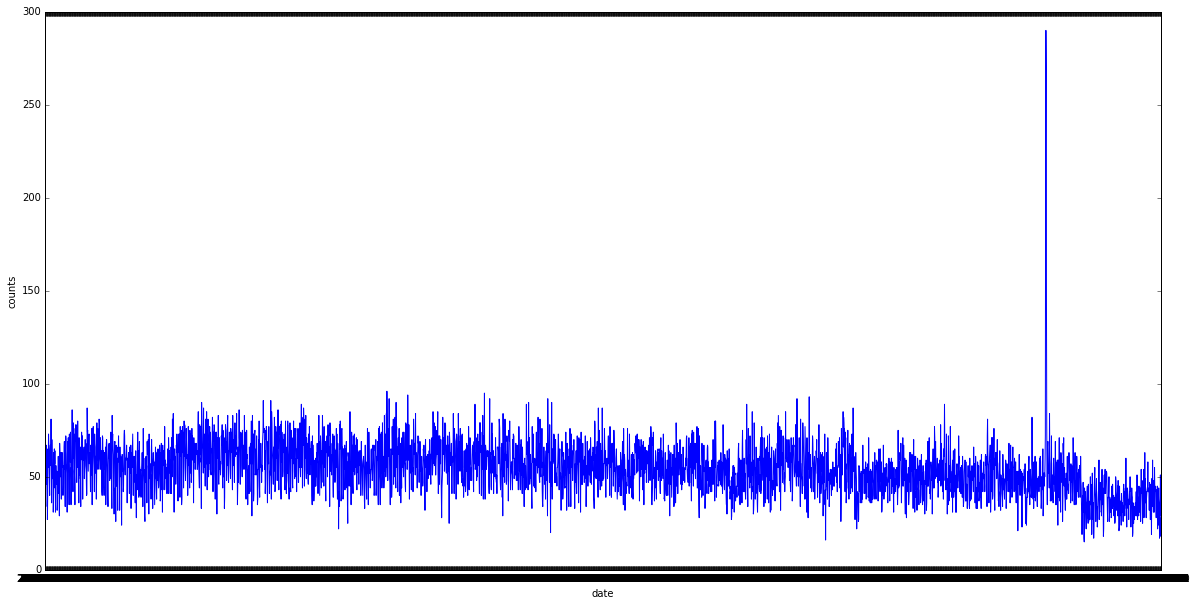

In [10]:
# Create a plot
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=Crime_byDate_plt1, x="date", y="counts")
plt.show()

#### 1. Time - 2) Changes by Offense Categories

In [11]:
# Create a sub-df of crimes by categories from 2010 to 2020
Crime_byCategory_plt2 = CrimeACS_clsdf_copy.groupby(['date', 'case_offense_category']).size().reset_index(name='counts')
# Remove outliers for a better visualization
Crime_byCategory_plt2_filtered = Crime_byCategory_plt2[Crime_byCategory_plt2['counts'] < 100]
Crime_byCategory_plt2_filtered.tail()

,date,case_offense_category,counts
26750,2020-12-31,Burglary,5
26751,2020-12-31,Fraud,4
26752,2020-12-31,Narcotics,3
26753,2020-12-31,Theft,12
26754,2020-12-31,Vehicle Theft,1


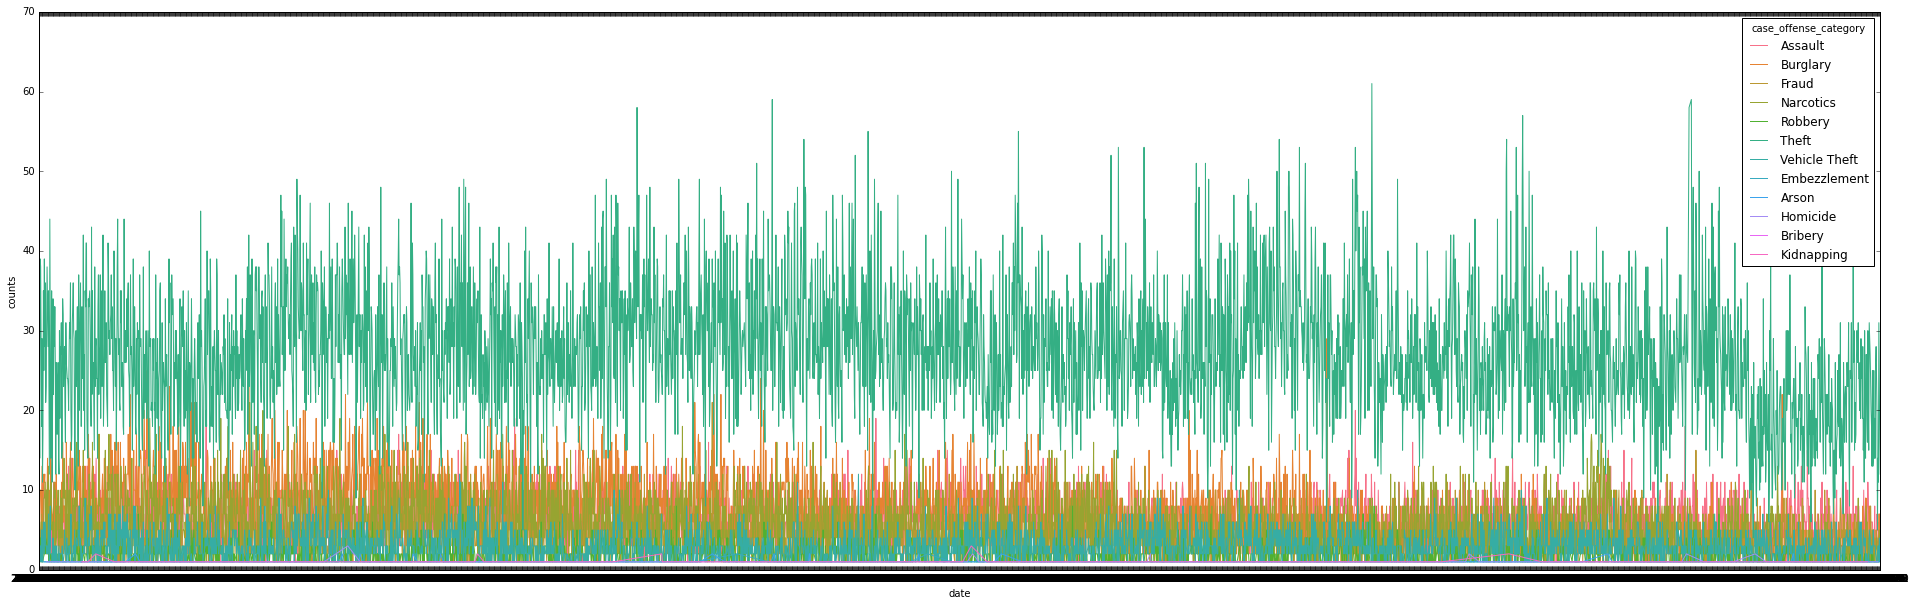

In [12]:
# Create a plot
plt.figure(figsize = (33,10))
sns.lineplot(data=Crime_byCategory_plt2_filtered, x="date", y="counts", hue="case_offense_category")
plt.show()

#### 1. Time - 3) Heatmap by day of week and hour of day

In [13]:
# 1) Total number of crimes in Orlando from 2010 to 2020
# Craete a sub-df of crimes by days of week and hours 
Crime_byDayofweekHour_plt3 = CrimeACS_clsdf_copy.groupby(['weekday', 'hour']).size().reset_index(name='counts').pivot(index='weekday', columns='hour', values='counts').reset_index(drop = True)
Crime_byDayofweekHour_plt3_reindex = Crime_byDayofweekHour_plt3.rename({0: 'Monday', 1: 'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, axis='index').reindex()
Crime_byDayofweekHour_plt3_reindex

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Monday,810,713,726,491,374,382,707,1345,1992,2231,2374,2413,2345,2284,2281,2182,2069,1749,1751,1483,1286,1280,1038,956
Tuesday,746,648,523,428,324,355,618,1091,1663,1912,2143,2249,2180,2189,2223,2253,2092,1805,1728,1622,1352,1270,1092,924
Wednesday,817,666,682,434,347,344,556,1110,1646,1845,2068,2132,2222,2231,2281,2241,2020,1783,1714,1533,1422,1358,1141,939
Thursday,858,693,732,474,330,354,564,1013,1536,1947,2001,2107,2035,2215,2158,2174,2078,1780,1599,1521,1281,1188,1026,940
Friday,817,744,748,540,335,312,566,972,1518,1841,1920,1971,1973,1978,2112,2061,1892,1712,1643,1442,1414,1279,1282,1158
Saturday,1071,1086,1210,772,510,423,430,667,958,1086,1235,1353,1286,1381,1370,1348,1345,1340,1442,1318,1279,1304,1162,1077
Sunday,1082,1103,1167,778,496,400,360,549,757,942,1174,1221,1279,1276,1296,1273,1314,1333,1300,1352,1169,1115,1009,958


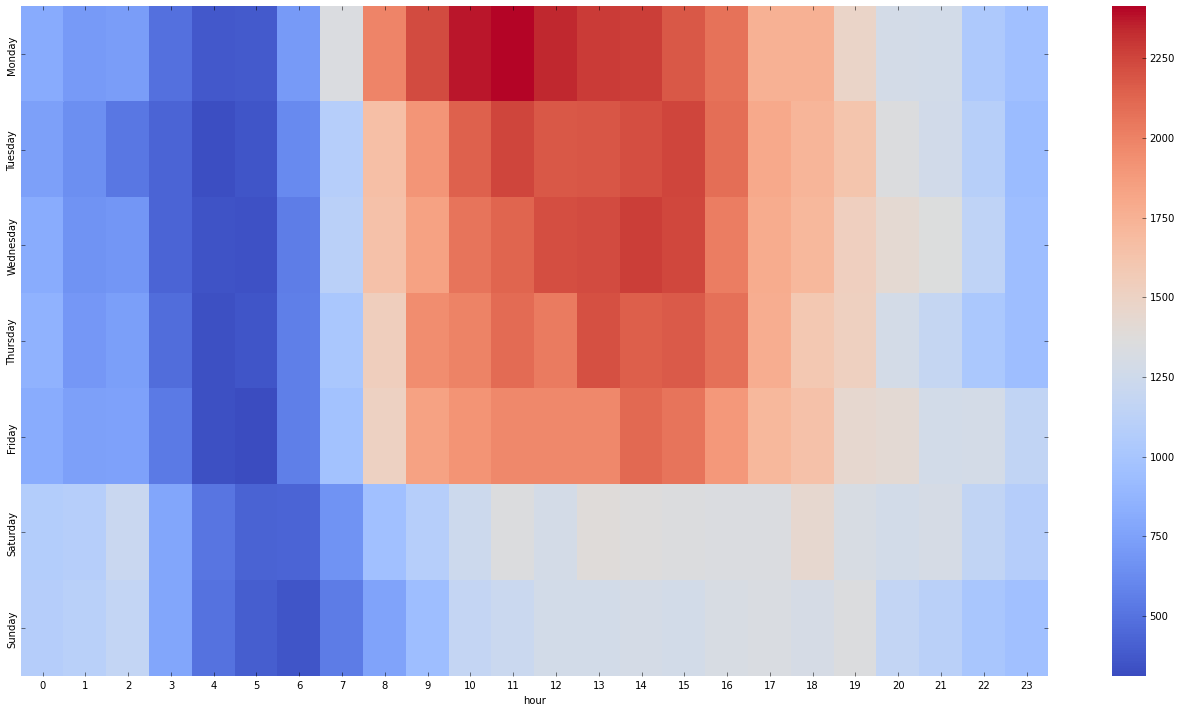

In [122]:
# Create a heatmap
plt.figure(figsize = (23,12))
ax = sns.heatmap(Crime_byDayofweekHour_plt3_reindex, cmap="coolwarm")
plt.show()

In [15]:
# 2) Create a heatmap by Category
# Before creating heatmaps, find the unique values and the counts of case_offense_category colum
CrimeACS_clsdf_copy.case_offense_category.value_counts()
# will create the most 6 crimes heatmap, which are Theft, Burglary, Assault, Narcotics, Fraud, Vehicle Theft

Theft            111026
Burglary          28427
Assault           24748
Narcotics         21743
Fraud             14294
Vehicle Theft     11336
Robbery            6005
Arson               274
Homicide            188
Kidnapping          115
Embezzlement         57
Bribery               1
Name: case_offense_category, dtype: int64

In [116]:
# create a sub-dataframe
data = CrimeACS_clsdf_copy.groupby(['case_offense_category', 'hour', 'weekday']).size().reset_index(name='counts')
data = data[data['case_offense_category'].isin(['Theft', 'Burglary', 'Assault', 'Narcotics', 'Fraud', 'Vehicle Theft'])]
data.head()

,case_offense_category,hour,weekday,counts
132,Assault,0,0,164
133,Assault,0,1,120
134,Assault,0,2,139
135,Assault,0,3,137
136,Assault,0,4,143


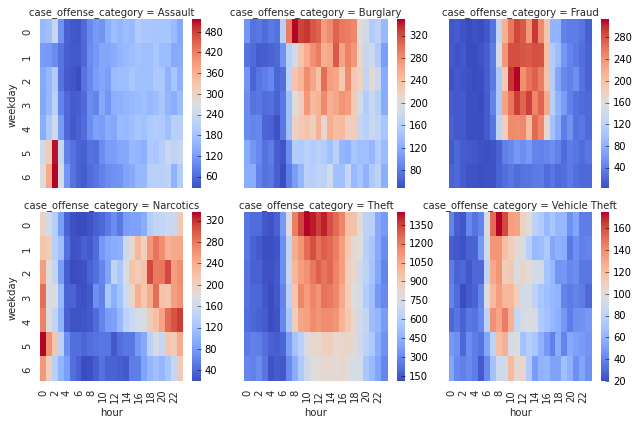

In [124]:
# Create a heatmap
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs)

with sns.axes_style("dark"):
    fg = sns.FacetGrid(data, col='case_offense_category', col_wrap=3)
fg.map_dataframe(draw_heatmap, 'hour', 'weekday', 'counts', cbar=True, cmap="coolwarm")
plt.show()

#### 2. Location - Numbers and Densities by Neighborhoods

In [126]:
# First, create a dataframe by neighborhoods
Crime_byNeighbors_plt4 = CrimeACS_clsdf_copy.groupby(['neighborho', 'shape_area_left']).size().reset_index(name='counts')
Crime_byNeighbors_plt4['densities'] = Crime_byNeighbors_plt4['counts'] / Crime_byNeighbors_plt4['shape_area_left']
Crime_byNeighbors_plt4.head()

,neighborho,shape_area_left,counts,densities
0,33rd St. Industrial,2.994811e+06,1254,0.000419
1,Airport North,2.046107e+07,6606,0.000323
2,Audubon Park,1.850594e+06,657,0.000355
3,Azalea Park,6.353966e+05,273,0.000430
4,Baldwin Park,5.940521e+06,2601,0.000438


In [128]:
# Sort by counts and densities
Crime_byNeighbors_plt4_counts = Crime_byNeighbors_plt4.sort_values(by='counts',ascending=False).rename(columns = {'neighborho': "Neighborhoods"})
Crime_byNeighbors_plt4_densities = Crime_byNeighbors_plt4.sort_values(by='densities',ascending=False).rename(columns = {'neighborho': "Neighborhoods"})

# Create a list for Top 10 Neighborhoods of Counts and Densities
Crime_byNeighbors_plt4_counts10 = Crime_byNeighbors_plt4_counts.iloc[0:10, 0:1].rename(columns = {'Neighborhoods': "Top 10 Crime Numbers"})
Crime_byNeighbors_plt4_densities10 = Crime_byNeighbors_plt4_densities.iloc[0:10, 0:1].rename(columns = {'Neighborhoods': "Top 10 Crime Densities"})

pd.concat([Crime_byNeighbors_plt4_counts10.reset_index(drop=True), Crime_byNeighbors_plt4_densities10.reset_index(drop=True)], axis=1)

,Top 10 Crime Numbers,Top 10 Crime Densities
0,Florida Center,Central Business District
1,Central Business District,Holden/Parramore
2,Metro West,Lake Dot
3,Holden/Parramore,Callahan
4,Millenia,Camellia Gardens
5,Colonial Town Center,South Eola
6,Airport North,Lake Fredrica
7,ORLANDO INTERNATIONAL AIRPORT,Colonial Town Center
8,South Semoran,The Willows
9,Florida Center North,Lorna Doone


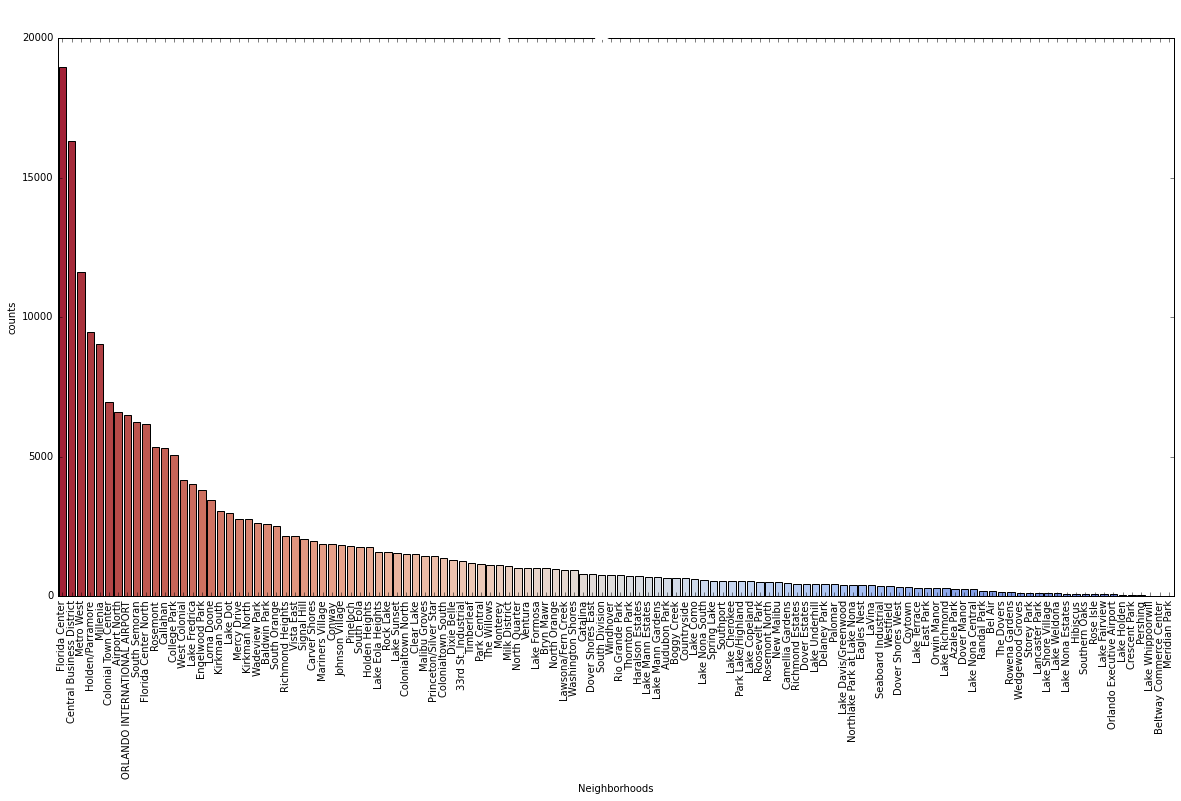

In [131]:
# Create plots - 1) Number of Crimes by Neighborhoods
plt.figure(figsize = (20,10))
ax = sns.barplot(x='Neighborhoods', y='counts', data=Crime_byNeighbors_plt4_counts, palette="coolwarm_r")
plt.xticks(rotation=90)
plt.title("Crime Counts by Neighborhoods in Orlando", fontsize = 33, fontweight = 'bold', color ='white')
plt.show()

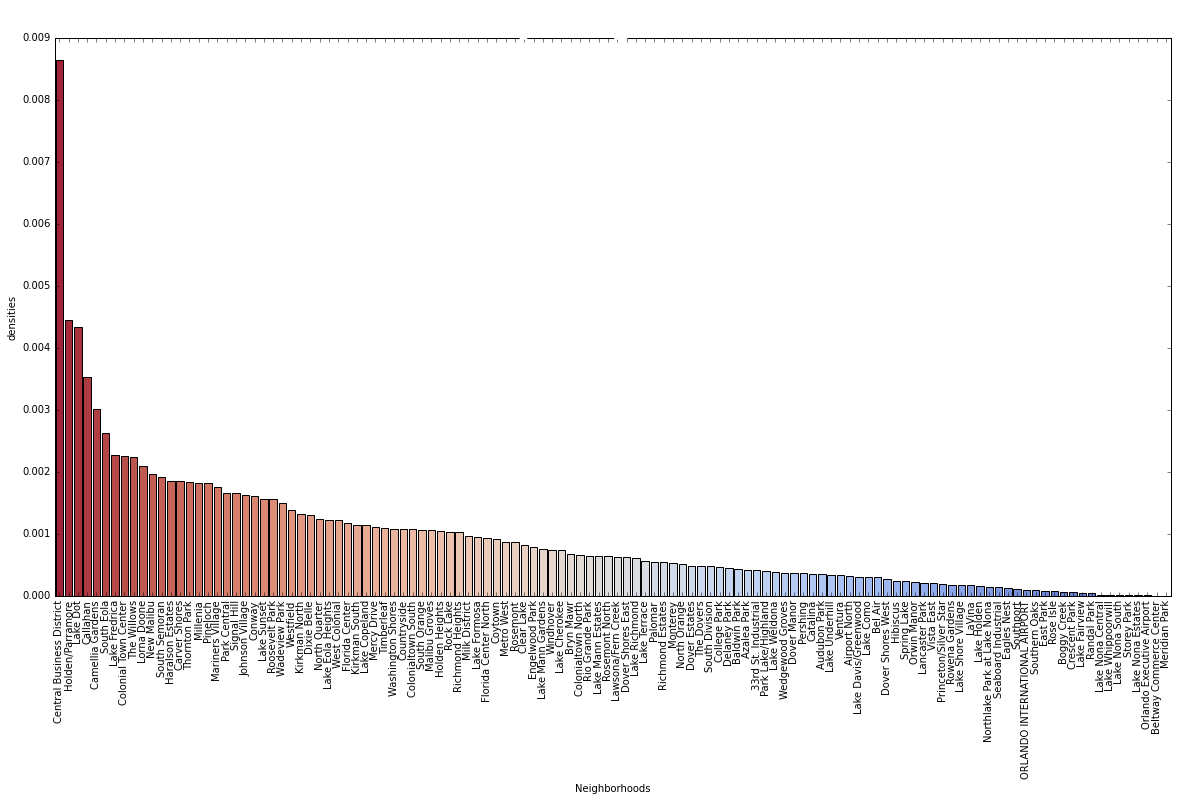

In [132]:
# Create plots - 2) Crimes Densities by Neighborhoods
plt.figure(figsize = (20,10))
ax = sns.barplot(x='Neighborhoods', y='densities', data=Crime_byNeighbors_plt4_densities, palette="coolwarm_r")
plt.xticks(rotation=90)
plt.title("Crime Densities by Neighborhoods in Orlando", fontsize = 33, fontweight = 'bold', color ='white')
plt.show()

#### 3. ACS - Correlation plots

<Figure size 1440x720 with 0 Axes>

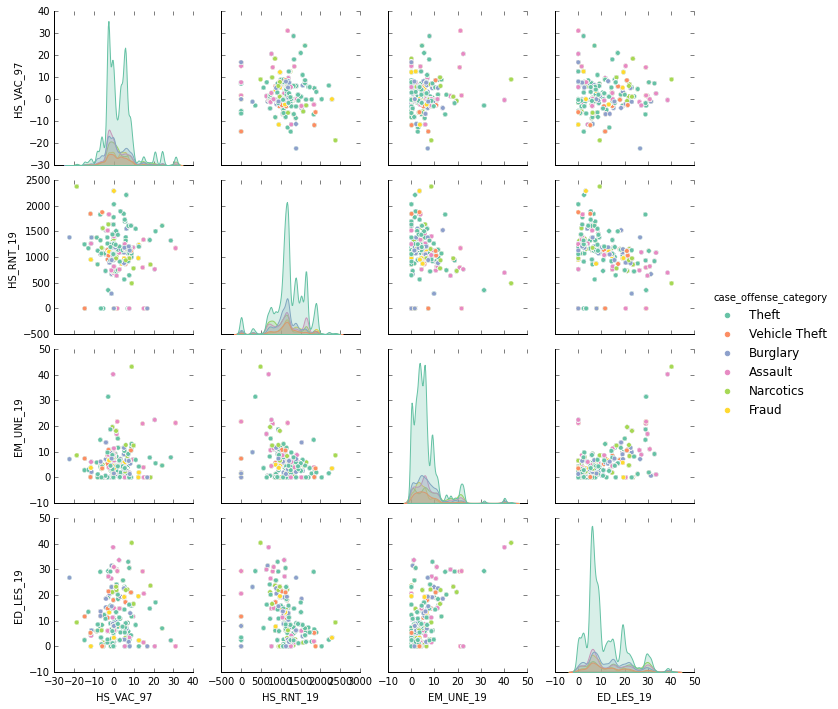

In [141]:
# Create a sub-dataframe and a correlation plot
ACS_byHSEMED_plt5 = CrimeACS_clsdf_copy[['HS_VAC_97', 'HS_RNT_19', 'EM_UNE_19', 'ED_LES_19', 'case_offense_category']]
ACS_byHSEMED_plt5 = test1[test1['case_offense_category'].isin(['Theft', 'Burglary', 'Assault', 'Narcotics', 'Fraud', 'Vehicle Theft'])]

plt.figure(figsize = (20,10))
sns.pairplot(ACS_byHSEMED_plt5, hue="case_offense_category", palette="Set2", diag_kind="kde", height=2.5)
plt.show()